### [Reading]:

You needn't finish reading all of them in just one week!
It's just good for you to know what's happening in this area and to figure out how people try to improve SIFT.

You needn't to remember all of them. 
But please DO REMEMBER procedures of SIFT and HoG. For those who're interested in SLAM, Orb is your inevitable destiny.

1. [optional] Bilateral Filter: https://blog.csdn.net/piaoxuezhong/article/details/78302920
2. Feature Descriptors:
   [Compulsory]
   Hog: https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
   SURF: https://www.vision.ee.ethz.ch/~surf/eccv06.pdf
   [optional]
   BRISK: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.371.1343&rep=rep1&type=pdf
   Orb: http://www.willowgarage.com/sites/default/files/orb_final.pdf [Compulsory for SLAM Guys]
3. Preview parts:
   K-Means: I have no doubts about what you are going to read and where you gonna find the reading materials. There are tons of papers/blogs describing k-means. Just grab one and read.We'll talk about this topic in 3 weeks.

### [Coding]:
Finish 2D convolution/filtering by your self. 
What you are supposed to do can be described as "median blur", which means by using a sliding window on an image, your task is not going to do a normal convolution, but to find the median value within that crop.

You can assume your input has only one channel. (a.k.a a normal 2D list/vector) And you do need to consider the padding method and size. There are 2 padding ways: REPLICA & ZERO. When "REPLICA" is given to you, the padded pixels are same with the border pixels. E.g is [1 2 3] is your image, the padded version will be  [[(...1 1) 1 2 3 (3 3...)]  where how many 1 & 3 in the parenthesis depends on your padding size. When "ZERO", the padded version will be [(...0 0) 1 2 3 (0 0...)]

Assume your input's size of the image is W x H, kernel size's m x n. You may first complete a version with O(W·H·m·n log(m·n)) to O(W·H·m·n·m·n)).

Follow up 1: Can it be completed in a shorter time complexity?

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image
img_ori = cv2.imread('lenna.jpg')

In [2]:
class my_cv(object):
    def medianBlur(self, img, kernel, padding_way, timer=False):
    #        img & kernel is List of List; padding_way a string
    #        Please finish your code under this blank
        # Calculate padding range
        mid_x, mid_y = int(kernel[0]/2), int(kernel[1]/2)
        # Select padding methods (Step 1)
        if timer:
            start = time.clock()
        if padding_way == 'ZERO':
            img_tmp = np.pad(img, (mid_x, mid_y), 'constant', constant_values=(0,))
        elif padding_way == 'REPLICA':
            img_tmp = np.pad(img, (mid_x, mid_y), 'edge')
        if timer:
            elapsed = time.clock() - start
            print("Step 1 elapsed: %.5f" % elapsed)
        # Make a copy of the original image (Step 2)
        if timer:
            start = time.clock()
        img_medianBlur = img.copy()
        if timer:
            elapsed = time.clock() - start
            print("Step 2 elapsed: %.5f" % elapsed)
        # Main loop (Step 3)
        if timer:
            start = time.clock()
        for i in range(mid_x, mid_x+img.shape[0]):
            for j in range(mid_y, mid_y+img.shape[1]):
                # Get kernel from padded array
                kernel_mem = img_tmp[i-mid_x:i+mid_x+1,j-mid_y: j+mid_y+1]
                # Assign median of the kernel to copy
                img_medianBlur[i-mid_x][j-mid_y] = np.median(kernel_mem) # Follow up 1 The better solution should be O(n) instead O(nlogn)
        if timer:
            elapsed = time.clock() - start
            print("Step 3 elapsed: %.5f" % elapsed)
        cv2.imwrite('tmp.jpg', img_t)
        return img_medianBlur

Step 1 elapsed: 0.00040
Step 2 elapsed: 0.00023
Step 3 elapsed: 15.57562


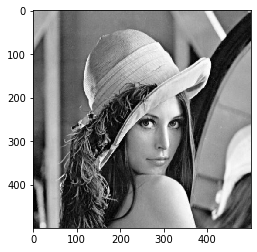

In [3]:
img_t = my_cv.medianBlur(None, cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY), (5, 5), 'REPLICA', timer=True)
plt.imshow(img_t, cmap='gray')
plt.show()

In [6]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
def test_medianBlur(img, kernel_size, fill):
    B, G, R = cv2.split(img)
    return cv2.merge((my_cv.medianBlur(None, B, kernel_size, fill, timer=True), my_cv.medianBlur(None, G, kernel_size, fill), my_cv.medianBlur(None, R, kernel_size, fill)))
img_midBlur = test_medianBlur(img_ori, (5, 5), 'REPLICA')

Step 1 elapsed: 0.00062
Step 2 elapsed: 0.00005
Step 3 elapsed: 15.67111


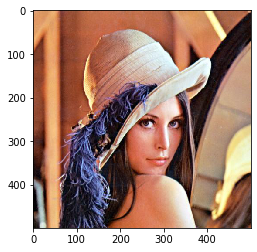

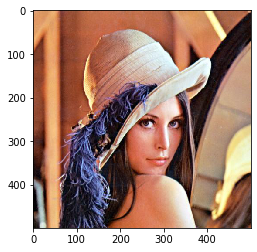

In [7]:
my_show(img_ori)
my_show(img_midBlur)

### [Reading + Pseudo Code]:
We haven't told RANSAC algorithm this week. So please try to do the reading.

And now, we can describe it here:
    We have 2 sets of points, say, Points A and Points B. We use A.1 to denote the first point in A, B.2 the 2nd point in B and so forth. Ideally, A.1 is corresponding to B.1, ... A.m corresponding B.m. However, it's obvious that the matching cannot be so perfect and the matching in our real world is like: 
    A.1-B.13, A.2-B.24, A.3-x (has no matching), x-B.5, A.4-B.24(This is a wrong matching) ...
    The target of RANSAC is to find out the true matching within this messy.
    
Algorithm for this procedure can be described like this:
    1. Choose 4 pair of points randomly in our matching points. Those four called "inlier" (中文： 内点) while others "outlier" (中文： 外点)
    2. Get the homography of the inliers
    3. Use this computed homography to test all the other outliers. And separated them by using a threshold into two parts:
        a. new inliers which is satisfied our computed homography
        b. new outliers which is not satisfied by our computed homography.
    4. Get our all inliers (new inliers + old inliers) and goto step 2
    5. As long as there's no changes or we have already repeated step 2-4 k, a number actually can be computed, times, we jump out of the recursion. The final homography matrix will be the one that we want.

[WARNING!!! RANSAC is a general method. Here we add our matching background to that.]

Your task: please complete pseudo code (it would be great if you hand in real code!) of this procedure.

Python:
def ransacMatching(A, B):
    A & B: List of List

Follow up 1. For step 3. How to do the "test“? Please clarify this in your code/pseudo code
Follow up 2. How do decide the "k" mentioned in step 5. Think about it mathematically!

You are supposed to hand in the code in 1 week.

In [ ]:
# RANSAC伪代码：
def ransacMatching(A, B):
    A & B: List of List
    matching_threshold: minimal data points to evaluate a model
    iterations: maximum number of iterations allowed
    error_tolerance: threshold value to determine when a data point fits a model
    best_error_rate: a very large number (infinite)
    best_model: null
    while iterations: 
        iterations -= 1
        A_inliers = set(getNRandomData(A))
        B_inliers = set(getNRandomData(B))
        A_warpped = buildModelFromAToBAndWarpA(A_inliers, B_inliers, A)
        for i in range(len(A_warpped)): # Follow up 1 @ step 3
            if distance(A_warpped[i], B) <= error_tolerance:
                A_inliers.add(A[i])
                B_inliers.add(A_wrapped[i])
        if matching_threshold == len(A_inliers) or len(A_inliers) > len(best_model[0]): # Follow up 2 @ step 5
            bettermodel = (A_inliers, B_inliers)
            this_error_rate = evaluate(bettermodel)
            if this_error_rate < best_error_rate:
                best_model = bettermodel
                best_error_rate = this_error_rate
    return best_model